# The Simpsons Characters 
This project deals with recognizing the faces from the popular TV show - [The Simpsons](https://www.fox.com/the-simpsons/). <br> The data to this project is downloaded from [Kaggle](https://www.kaggle.com/alexattia/the-simpsons-characters-dataset)<br>
![Image](https://img1.hotstarext.com/image/upload/f_auto,t_hcdl/sources/r1/cms/prod/7077/847077-h)

### The Files and there explanations: 

File simpson-set.tar.gz : This is an image dataset: 20 folders (one for each character) with 400-2000 pictures in each folder.

File simpson-test-set.zip. : Preview of the image dataset

File weights.best.h5 : Weights computed, in order to predict in Kernels.

File annotation.txt : Annotation file for bounding boxes for each character

In [ ]:
# Unzipping the dataset
# !unzip -u "/content/drive/MyDrive/Simpsons.zip" -d "/content/drive/My Drive/Simpsons/"

In [ ]:
# External libraries needed for the project
#!pip install caer canaro

In [ ]:
# pre-installed libraries needed
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc
import pandas as pd

When working with Deeplearning models (Computer Vision) our model expects all our image data of same size and some pre-defined transformations.

In [ ]:
IMG_SIZE = (80,80)
channels = 1 # Since we don't need color it will be gray scale
char_path = r'/content/drive/MyDrive/Simpsons/simpsons_dataset' # path for our actual datasets

Finding and grabbing the top 10 characters which have the most number of images in that dataset.

 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Simpsons/number_pic_char.csv')
data[:10]

,Unnamed: 0,name,total,train,test,bounding_box
0,0,Homer Simpson,2246,1909,337,612
1,1,Ned Flanders,1454,1236,218,595
2,2,Moe Szyslak,1452,1234,218,215
3,3,Lisa Simpson,1354,1151,203,562
4,4,Bart Simpson,1342,1141,201,554
5,5,Marge Simpson,1291,1097,194,557
6,6,Krusty The Clown,1206,1025,181,226
7,7,Principal Skinner,1194,1015,179,506
8,8,Charles Montgomery Burns,1193,1014,179,650
9,9,Milhouse Van Houten,1079,917,162,210


In [ ]:
# saving the cloumns in variables
name = pd.Series(data["name"])
total = pd.Series(data["total"])

In [ ]:
char_dict = {}
for char in range(len(name)):
  char_dict[name[char]] = total[char] 

char_dict

{'Abraham Grampa Simpson': 913,
 'Agnes Skinner': 42,
 'Apu Nahasapeemapetilon': 623,
 'Barney Gumble': 106,
 'Bart Simpson': 1342,
 'Bumblebee Man': 0,
 'Carl Carlson': 98,
 'Charles Montgomery Burns': 1193,
 'Chief Wiggum': 986,
 'Cletus Spuckler': 47,
 'Comic Book Guy': 469,
 'Disco Stu': 8,
 'Edna Krabappel': 457,
 'Fat Tony': 27,
 'Gil': 27,
 'Groundskeeper Willie': 121,
 'Hans Moleman': 0,
 'Helen Lovejoy': 0,
 'Homer Simpson': 2246,
 'Jasper Beardly': 0,
 'Jimbo Jones': 0,
 'Kent Brockman': 498,
 'Krusty The Clown': 1206,
 'Lenny Leonard': 310,
 'Lionel Hutz': 3,
 'Lisa Simpson': 1354,
 'Maggie Simpson': 128,
 'Marge Simpson': 1291,
 'Martin Prince': 71,
 'Mayor Quimby': 246,
 'Milhouse Van Houten': 1079,
 'Miss Hoover': 17,
 'Moe Szyslak': 1452,
 'Ned Flanders': 1454,
 'Nelson Muntz': 358,
 'Otto Mann': 32,
 'Patty Bouvier': 72,
 'Principal Skinner': 1194,
 'Professor John Frink': 65,
 'Rainier Wolfcastle': 45,
 'Ralph Wiggum': 89,
 'Selma Bouvier': 103,
 'Sideshow Bob': 877,
 

In [ ]:
# Sorting in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('Homer Simpson', 2246),
 ('Ned Flanders', 1454),
 ('Moe Szyslak', 1452),
 ('Lisa Simpson', 1354),
 ('Bart Simpson', 1342),
 ('Marge Simpson', 1291),
 ('Krusty The Clown', 1206),
 ('Principal Skinner', 1194),
 ('Charles Montgomery Burns', 1193),
 ('Milhouse Van Houten', 1079),
 ('Chief Wiggum', 986),
 ('Abraham Grampa Simpson', 913),
 ('Sideshow Bob', 877),
 ('Apu Nahasapeemapetilon', 623),
 ('Kent Brockman', 498),
 ('Comic Book Guy', 469),
 ('Edna Krabappel', 457),
 ('Nelson Muntz', 358),
 ('Lenny Leonard', 310),
 ('Mayor Quimby', 246),
 ('Waylon Smithers', 181),
 ('Maggie Simpson', 128),
 ('Groundskeeper Willie', 121),
 ('Barney Gumble', 106),
 ('Selma Bouvier', 103),
 ('Carl Carlson', 98),
 ('Ralph Wiggum', 89),
 ('Patty Bouvier', 72),
 ('Martin Prince', 71),
 ('Professor John Frink', 65),
 ('Snake Jailbird', 55),
 ('Cletus Spuckler', 47),
 ('Rainier Wolfcastle', 45),
 ('Agnes Skinner', 42),
 ('Sideshow Mel', 40),
 ('Otto Mann', 32),
 ('Fat Tony', 27),
 ('Gil', 27),
 ('Miss Hoover'

In [ ]:
#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['Homer Simpson',
 'Ned Flanders',
 'Moe Szyslak',
 'Lisa Simpson',
 'Bart Simpson',
 'Marge Simpson',
 'Krusty The Clown',
 'Principal Skinner',
 'Charles Montgomery Burns',
 'Milhouse Van Houten']

In [ ]:
# Creating the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

Streaming output truncated to the last 5000 lines.
966 - marge_simpson
967 - marge_simpson
968 - marge_simpson
969 - marge_simpson
970 - marge_simpson
971 - marge_simpson
972 - marge_simpson
973 - marge_simpson
974 - marge_simpson
975 - marge_simpson
976 - marge_simpson
977 - marge_simpson
978 - marge_simpson
979 - marge_simpson
980 - marge_simpson
981 - marge_simpson
982 - marge_simpson
983 - marge_simpson
984 - marge_simpson
985 - marge_simpson
986 - marge_simpson
987 - marge_simpson
988 - marge_simpson
989 - marge_simpson
990 - marge_simpson
991 - marge_simpson
992 - marge_simpson
993 - marge_simpson
994 - marge_simpson
995 - marge_simpson
996 - marge_simpson
997 - marge_simpson
998 - marge_simpson
999 - marge_simpson
1000 - marge_simpson
1001 - marge_simpson
1002 - marge_simpson
1003 - marge_simpson
1004 - marge_simpson
1005 - marge_simpson
1006 - marge_simpson
1007 - marge_simpson
1008 - marge_simpson
1009 - marge_simpson
1010 - marge_simpson
1011 - marge_simpson
1012 - marge_simp

/usr/local/lib/python3.7/dist-packages/caer/core.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(obj, dtype=dtype, order=order)


In [ ]:
len(train)

13811

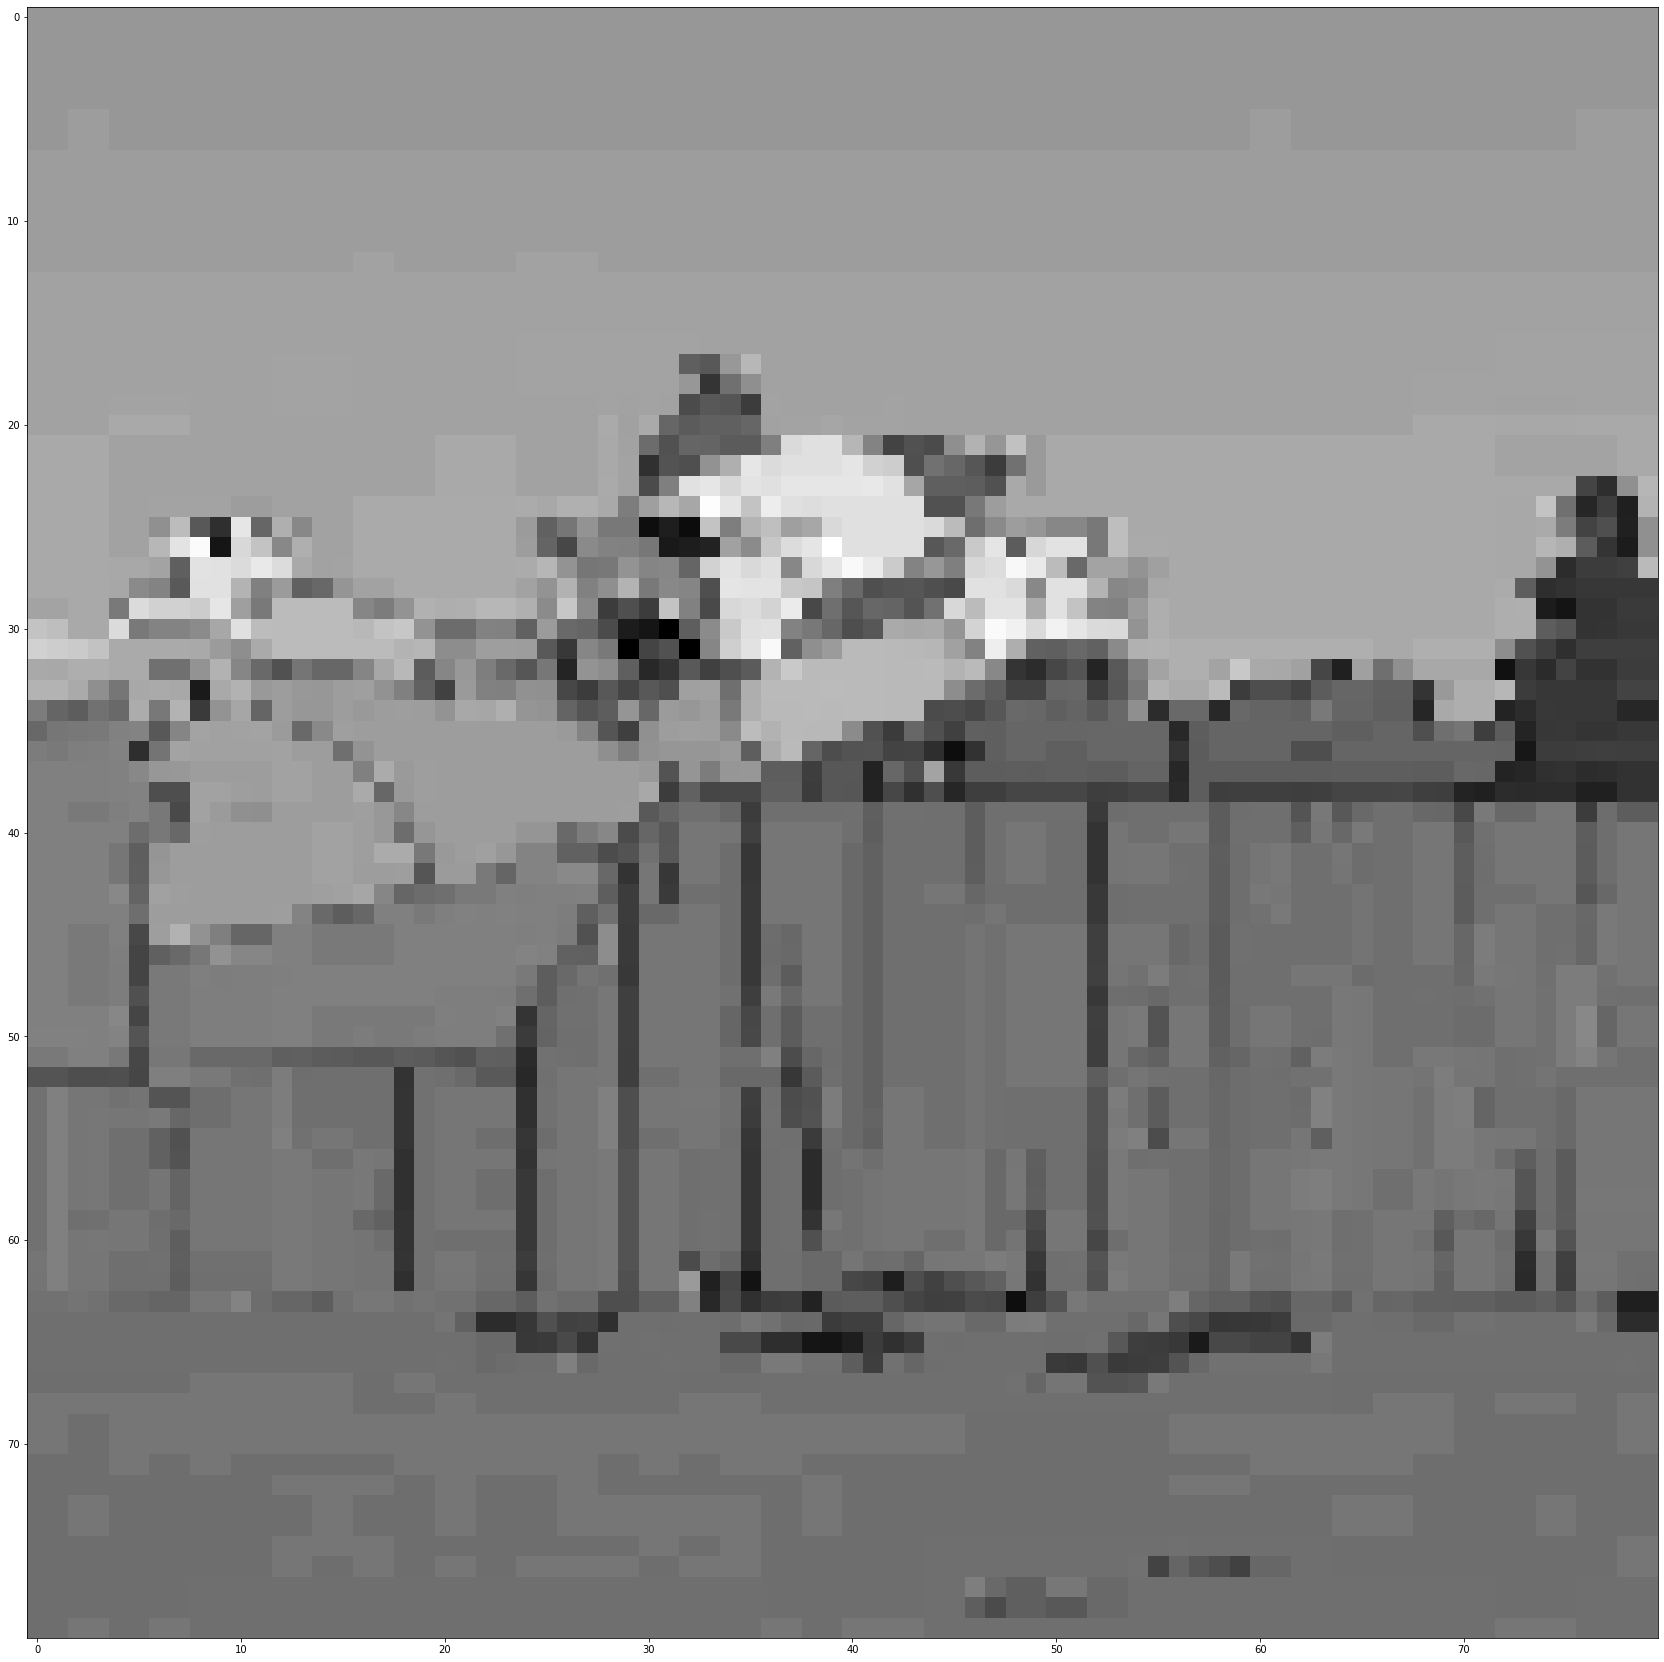

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap="gray")
plt.show()

In [ ]:
# Seperating the training set with featureSet and labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize the featureSet --> (0,1)
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [ ]:
import sklearn.model_selection as skm

split_data = skm.train_test_split(featureSet, labels, test_size=.2)
x_train, x_val, y_train, y_val = (np.array(item) for item in split_data)

In [ ]:
del train
del featureSet
del labels
gc.collect()

2636

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
# Image data generator (introduces randomness in network ==> better accuracy)
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [ ]:
# Create our model (returns the compiled model)
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [ ]:
# Training the model

training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
345/345 [==============================] - 11s 32ms/step - loss: 0.2914 - accuracy: 0.2937 - val_loss: 0.2929 - val_accuracy: 0.3272
Epoch 2/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2897 - accuracy: 0.3086
Epoch 3/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2873 - accuracy: 0.3163
Epoch 4/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2838 - accuracy: 0.3348
Epoch 5/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2797 - accuracy: 0.3446
Epoch 6/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2749 - accuracy: 0.3607
Epoch 7/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2703 - accuracy: 0.3786
Epoch 8/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2650 - accuracy: 0.4001
Epoch 9/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2604 - accuracy: 0.4085
Epoch 10/10
345/345 [===================

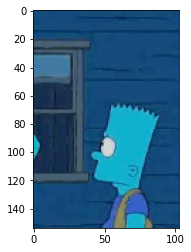

In [ ]:
test_path = r'/content/drive/MyDrive/Simpsons/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_11.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [ ]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

predictions = model.predict(prepare(img))

In [ ]:
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

lisa_simpson
